In [2]:
from model_utils import *

labels=pd.read_json('../../src/bazinga/database/Clean_Headlines.json', lines=True)
labels=labels['is_sarcastic']
embeddings = np.load('../../src/bazinga/database/bert_embeddings.npy')
embeddings = pd.DataFrame(embeddings)

# Example with Word2Vec embeddings
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2, random_state=42)

In [74]:
# Convert labels to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Define the neural network model
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_cat, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100


/home/not2/my_ml_project/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-29 15:32:53.639825: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 52509696 exceeds 10% of free system memory.


535/535 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7107 - loss: 0.5480 - val_accuracy: 0.8648 - val_loss: 0.3137
Epoch 2/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8381 - loss: 0.3678 - val_accuracy: 0.8706 - val_loss: 0.3050
Epoch 3/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8545 - loss: 0.3320 - val_accuracy: 0.8741 - val_loss: 0.2959
Epoch 4/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8613 - loss: 0.3278 - val_accuracy: 0.8755 - val_loss: 0.2889
Epoch 5/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8680 - loss: 0.3108 - val_accuracy: 0.8797 - val_loss: 0.2902
Epoch 6/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8739 - loss: 0.2914 - val_accuracy: 0.8832 - val_loss: 0.2785
Epoch 7/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8784 - loss: 0.2864 - val_accuracy: 0.8795 - val_loss: 0.2751
Epoch 8/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8846 - loss: 0.2693 - val_accuracy: 0.8765

In [7]:
experiment_name = "Binary_Classification_Experiment"

# Check if the experiment already exists
experiment = mlflow.get_experiment_by_name(experiment_name)
if experiment:
    print(f"Experiment '{experiment_name}' already exists.")
else:
    try:
        mlflow.create_experiment(experiment_name)
        print(f"Experiment '{experiment_name}' created.")
    except mlflow.exceptions.MlflowException as e:
        print(f"Error creating experiment '{experiment_name}': {e}")

# Set the experiment
mlflow.set_experiment(experiment_name)
print(f"Experiment '{experiment_name}' set.")

Experiment 'Binary_Classification_Experiment' already exists.
Experiment 'Binary_Classification_Experiment' set.


Epoch 1/100


/home/not2/my_ml_project/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


535/535 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6045 - loss: 0.6590 - val_accuracy: 0.8135 - val_loss: 0.4417
Epoch 2/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7904 - loss: 0.4680 - val_accuracy: 0.8437 - val_loss: 0.3586
Epoch 3/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8207 - loss: 0.4119 - val_accuracy: 0.8584 - val_loss: 0.3343
Epoch 4/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8351 - loss: 0.3747 - val_accuracy: 0.8425 - val_loss: 0.3545
Epoch 5/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8514 - loss: 0.3597 - val_accuracy: 0.8687 - val_loss: 0.3082
Epoch 6/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8543 - loss: 0.3439 - val_accuracy: 0.8753 - val_loss: 0.2974
Epoch 7/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8583 - loss: 0.3294 - val_accuracy: 0.8727 - val_loss: 0.2930
Epoch 8/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8654 - loss: 0.3190 - val_accuracy: 0.8758

2024/05/29 17:07:50 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


Accuracy: 0.8869337326843879
Precision: 0.8696943972835314
Recall: 0.8734015345268542
F1 Score: 0.8715440238196512
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2996
           1       0.87      0.87      0.87      2346

    accuracy                           0.89      5342
   macro avg       0.89      0.89      0.89      5342
weighted avg       0.89      0.89      0.89      5342



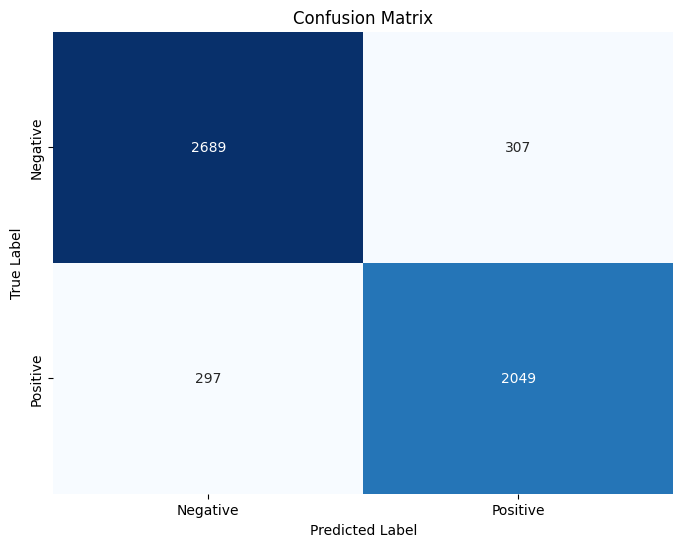

<Figure size 640x480 with 0 Axes>

In [104]:
# Start an MLflow run
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

with mlflow.start_run():
    # Log parameters
    mlflow.log_param("optimizer", "RMSprop")
    mlflow.log_param("loss", 'Binary Crossentropy')
    mlflow.log_param("epochs", 50)
    mlflow.log_param("batch_size", 32)
    
    # Train the model
    model.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
    
    # Make predictions
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    
    # Log model
    mlflow.keras.log_model(model, "model")
    
    # Create confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Display metrics
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    
    # Display classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Save confusion matrix plot
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")

/home/not2/my_ml_project/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2996
           1       0.86      0.84      0.85      2346

    accuracy                           0.87      5342
   macro avg       0.87      0.87      0.87      5342
weighted avg       0.87      0.87      0.87      5342



/home/not2/my_ml_project/venv/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


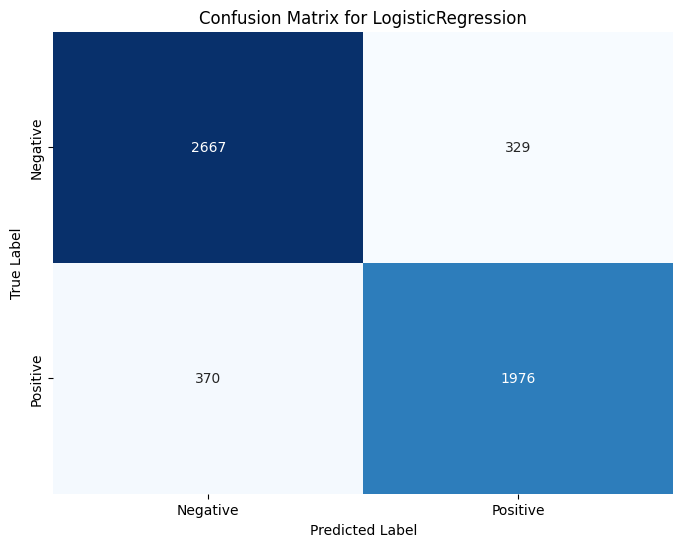

Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2996
           1       0.87      0.85      0.86      2346

    accuracy                           0.88      5342
   macro avg       0.88      0.87      0.88      5342
weighted avg       0.88      0.88      0.88      5342



<Figure size 640x480 with 0 Axes>

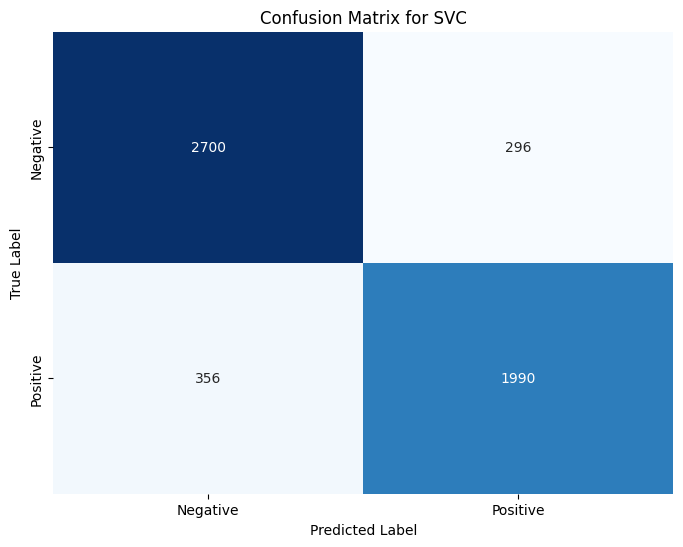

Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      2996
           1       0.84      0.75      0.79      2346

    accuracy                           0.82      5342
   macro avg       0.83      0.82      0.82      5342
weighted avg       0.83      0.82      0.82      5342



<Figure size 640x480 with 0 Axes>

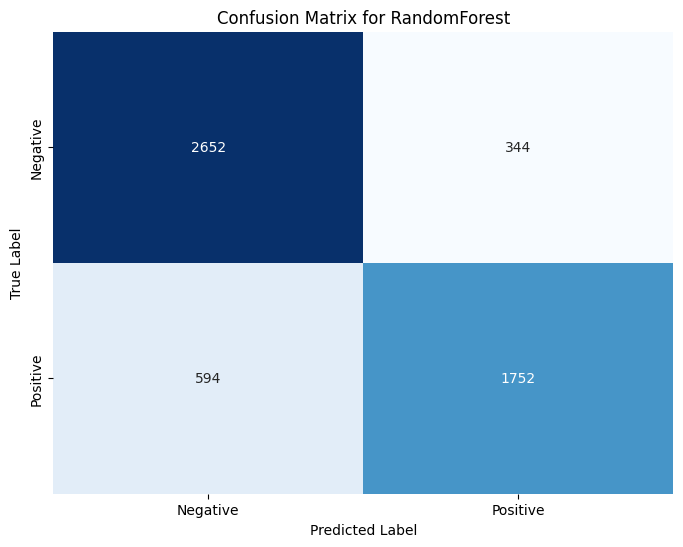

Classification Report for GradientBoosting:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      2996
           1       0.83      0.78      0.81      2346

    accuracy                           0.83      5342
   macro avg       0.83      0.83      0.83      5342
weighted avg       0.83      0.83      0.83      5342



<Figure size 640x480 with 0 Axes>

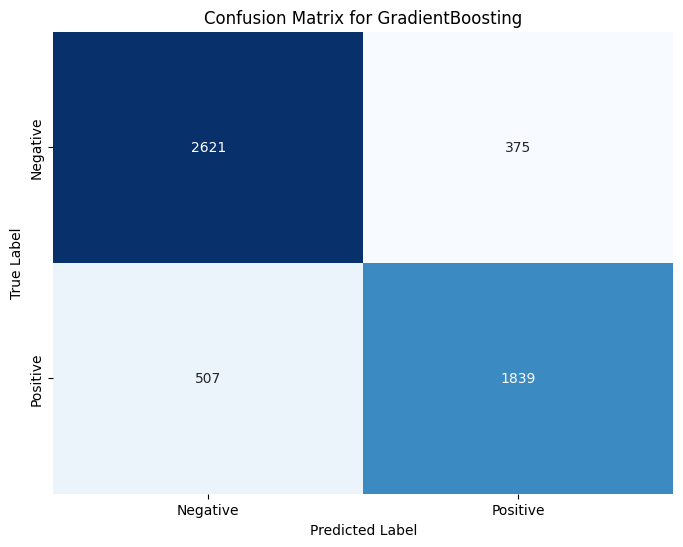

Classification Report for GaussianNB:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      2996
           1       0.75      0.73      0.74      2346

    accuracy                           0.77      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.77      0.77      0.77      5342



<Figure size 640x480 with 0 Axes>

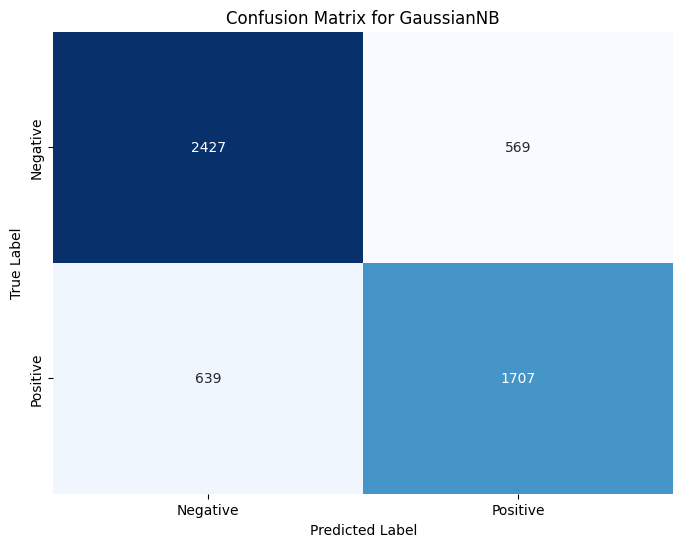

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2996
           1       0.83      0.82      0.82      2346

    accuracy                           0.84      5342
   macro avg       0.84      0.84      0.84      5342
weighted avg       0.84      0.84      0.84      5342



<Figure size 640x480 with 0 Axes>

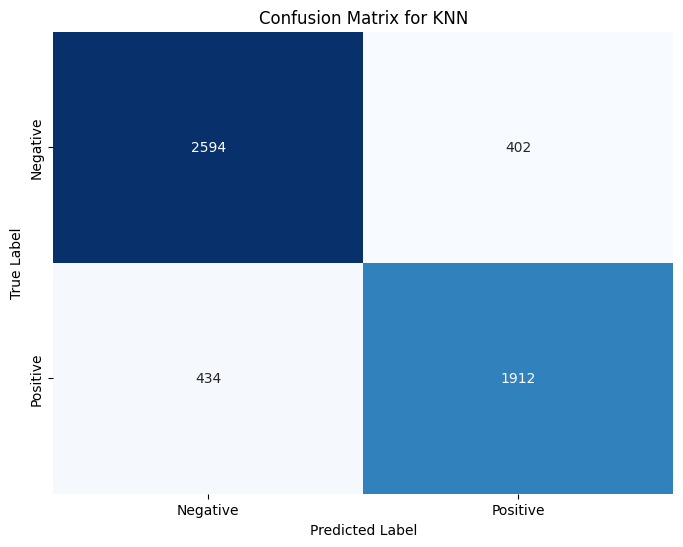

<Figure size 640x480 with 0 Axes>

In [9]:
# Define the models to evaluate
models = {
    "LogisticRegression": LogisticRegression(),
    "SVC": SVC(),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "GaussianNB": GaussianNB(),
    "KNN": KNeighborsClassifier()
}

# Loop through each model
for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Log the model parameters and metrics
        mlflow.log_param("model", model_name)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)

        # Log the model
        mlflow.sklearn.log_model(model, "model")

        # Print classification report
        print(f'Classification Report for {model_name}:')
        print(classification_report(y_test, y_pred))

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Confusion Matrix for {model_name}')
        plt.show()

        # Save confusion matrix plot
        plt.savefig(f"confusion_matrix_{model_name}.png")
        mlflow.log_artifact(f"confusion_matrix_{model_name}.png")